In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as mp
import pandas as pd
from collections import Counter
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neural_network import MLPClassifier 
from sklearn.datasets import load_iris
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ROCAUC
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from numpy import arange
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import learning_curve

In [2]:
data = pd.read_csv("./csgo_round_snapshots.csv")
data.head(5)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0,0,de_dust2,False,500,500,0,0,4000,...,0,0,0,0,0,0,0,0,0,CT
1,156.03,0,0,de_dust2,False,500,500,400,300,600,...,0,0,2,0,0,0,0,0,0,CT
2,96.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,2,0,0,0,0,0,0,CT
3,76.03,0,0,de_dust2,False,391,400,294,200,750,...,0,0,0,0,0,0,0,0,0,CT
4,174.97,1,0,de_dust2,False,500,500,192,0,18350,...,0,0,0,0,0,0,0,0,0,CT


In [3]:
non_numeric_features = data.drop(data.select_dtypes(np.number), axis=1)
non_numeric_features.head(5)

,map,bomb_planted,round_winner
0,de_dust2,False,CT
1,de_dust2,False,CT
2,de_dust2,False,CT
3,de_dust2,False,CT
4,de_dust2,False,CT


<BarContainer object of 2 artists>

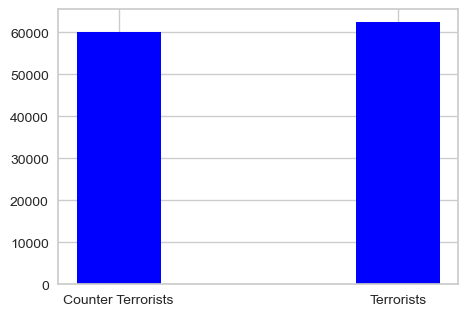

In [4]:
class_count = Counter(data["round_winner"])
graph = mp.figure()
ax = graph.add_axes([0.25,0.5,0.5,0.5])
ax.bar(["Counter Terrorists", "Terrorists"], [class_count["CT"], class_count["T"]], width=0.3, color="blue")

<AxesSubplot:>

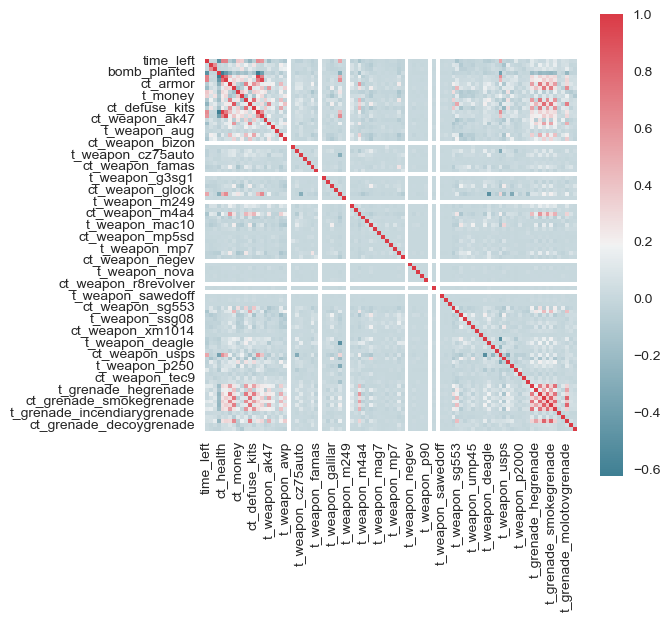

In [5]:
f, ax = plt.subplots(figsize=(6,6))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

{9: -0.14929804303852556, 83: -0.04706755779175779, 39: -0.04046841733454612, 89: -0.03895313468485108, 27: -0.03694108706499589, 8: -0.03581737490527603, 72: -0.03265656793259703, 16: -0.03044365330153685, 76: -0.02940774180283979, 42: -0.028984184422696655, 54: -0.0270617394359954, 77: -0.025675708693397567, 67: -0.024718482027737743, 24: -0.024161816178886325, 5: -0.018920054243548763, 43: -0.01881795968740865, 23: -0.017352023396685973, 11: -0.017233137205915072, 34: -0.016668779295960594, 95: -0.01662738339706223, 56: -0.014798496883926917, 81: -0.014656860726787534, 70: -0.0145634461640778, 74: -0.014047152071025297, 91: -0.01310342151364478, 88: -0.012757502935218521, 44: -0.012322943423460101, 40: -0.010940755357106235, 61: -0.00830849714855476, 79: -0.006772502934721391, 49: -0.0062686359861993755, 33: -0.0060995452354314665, 84: -0.005226015895254496, 2: -0.0047197927156497205, 35: -0.00438542061380688, 41: -0.0043240152624567894, 30: -0.004112233649758065, 25: -0.00358730437

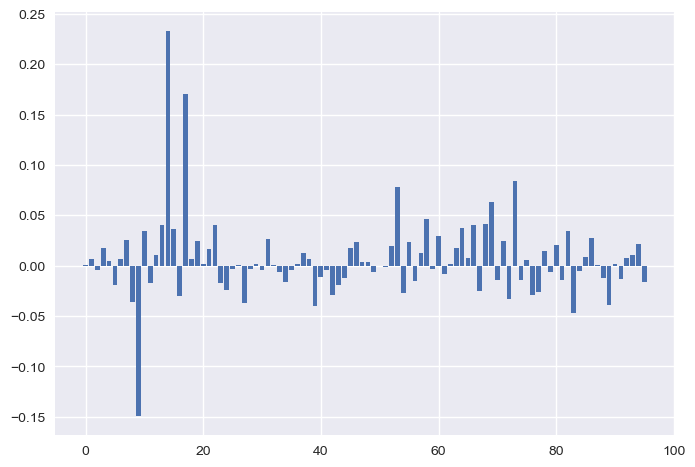

In [51]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=10000, n_features=96, n_informative=5, n_redundant=5)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance


corr_list = {}
for i,v in enumerate(importance):
    corr_list[i] = v
    
corr_list = dict(sorted(corr_list.items(), key=lambda item: item[1]))
print(corr_list)
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

pyplot.show()


In [6]:
#remove all the features with very little corelation
data=data.drop(["time_left","ct_money","t_money", "ct_score", "t_score", "t_players_alive", 'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova',
       'ct_weapon_p90', 't_weapon_p90', 'ct_weapon_r8revolver',
       't_weapon_r8revolver', 'ct_weapon_sawedoff', 't_weapon_sawedoff',
       'ct_weapon_scar20', 't_weapon_scar20', 'ct_weapon_sg553',
       't_weapon_sg553', 'ct_weapon_ssg08', 't_weapon_ssg08',
       'ct_weapon_ump45', 't_weapon_ump45', 'ct_weapon_xm1014',
       't_weapon_xm1014', 'ct_weapon_deagle', 't_weapon_deagle',
       'ct_weapon_fiveseven', 't_weapon_fiveseven', 'ct_weapon_usps',
       't_weapon_usps', 'ct_weapon_p250', 't_weapon_p250', 'ct_weapon_p2000',
       't_weapon_p2000', 'ct_weapon_tec9', 't_weapon_tec9', "ct_grenade_hegrenade", "ct_grenade_smokegrenade"], axis = 1)
data

,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,...,ct_grenade_flashbang,t_grenade_flashbang,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,de_dust2,False,500,500,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,CT
1,de_dust2,False,500,500,400,300,0,0,1,5,...,0,0,2,0,0,0,0,0,0,CT
2,de_dust2,False,391,400,294,200,0,0,1,4,...,0,0,2,0,0,0,0,0,0,CT
3,de_dust2,False,391,400,294,200,0,0,1,4,...,0,0,0,0,0,0,0,0,0,CT
4,de_dust2,False,500,500,192,0,0,0,1,5,...,0,0,0,0,0,0,0,0,0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,de_train,True,200,242,195,359,2,4,1,2,...,1,2,1,0,0,0,0,0,0,T
122406,de_train,False,500,500,95,175,1,2,1,5,...,1,2,0,0,0,0,0,0,0,T
122407,de_train,False,500,500,495,475,3,5,1,5,...,4,4,5,1,0,0,5,0,0,T
122408,de_train,False,500,500,495,475,3,5,1,5,...,1,5,3,0,0,0,4,0,0,T


In [7]:
data.columns 

Index(['map', 'bomb_planted', 'ct_health', 't_health', 'ct_armor', 't_armor',
       'ct_helmets', 't_helmets', 'ct_defuse_kits', 'ct_players_alive',
       't_grenade_hegrenade', 'ct_grenade_flashbang', 't_grenade_flashbang',
       't_grenade_smokegrenade', 'ct_grenade_incendiarygrenade',
       't_grenade_incendiarygrenade', 'ct_grenade_molotovgrenade',
       't_grenade_molotovgrenade', 'ct_grenade_decoygrenade',
       't_grenade_decoygrenade', 'round_winner'],
      dtype='object')

In [8]:
# Vectorizing all the non numeric features and implementing design matrix

columns = data.columns.tolist()
columns.remove("round_winner")
design_matrix = data[columns].copy(deep=True)

# Vectorize bomb_planted
design_matrix['bomb_planted'] = design_matrix["bomb_planted"].replace([True, False], [1, 0])

# Vectorize map
label_encoder = preprocessing.LabelEncoder() 
design_matrix['map'] = label_encoder.fit_transform(data['map'])


In [9]:
design_matrix.head(5)
                  

,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,1,0,500,500,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0
1,1,0,500,500,400,300,0,0,1,5,0,0,0,2,0,0,0,0,0,0
2,1,0,391,400,294,200,0,0,1,4,0,0,0,2,0,0,0,0,0,0
3,1,0,391,400,294,200,0,0,1,4,0,0,0,0,0,0,0,0,0,0
4,1,0,500,500,192,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0


In [10]:
#Vectorize output class
y = data["round_winner"].replace(["CT", "T"], [1, 0])
y.head(3)

0    1
1    1
2    1
Name: round_winner, dtype: int64

In [11]:
train, test, y_train, y_test = train_test_split(design_matrix, y, test_size=0.2)
train, val,  y_train,  y_val = train_test_split(train, y_train, test_size=0.2)

print(f"train shape:{train.shape}\nval shape:  {val.shape}\ntest shape: {test.shape}")

train shape:(78342, 20)
val shape:  (19586, 20)
test shape: (24482, 20)


In [12]:
# Training with default hyperparameters
pre_trained_model = LR()
pre_trained_model.fit(train, y_train)
pre_trained_model_output = pre_trained_model.predict(test)

/Users/sanchay/opt/anaconda3/envs/csgo/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


roc socre: 0.7469400699865785


/Users/sanchay/opt/anaconda3/envs/csgo/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


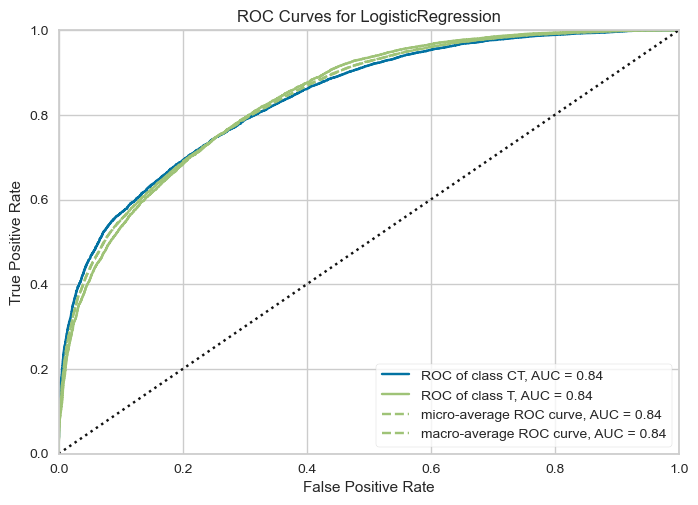

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [13]:
dummies1 = pd.get_dummies(pre_trained_model_output)
dummies2 = pd.get_dummies(y_test)
pre_trained_model_auc = roc_auc_score(dummies2, dummies1, average='macro')
print(f"roc socre: {pre_trained_model_auc}")

visualizer = ROCAUC(pre_trained_model, classes=["CT", "T"])
visualizer.fit(train, y_train)   
visualizer.score(test, y_test)       
visualizer.show()

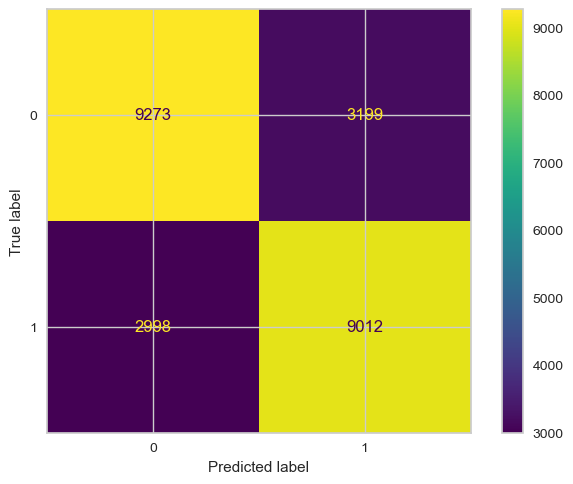

In [14]:
pre_trained_model_con_matrix = confusion_matrix(y_test, pre_trained_model_output, labels=pre_trained_model.classes_)
pre_trained_model_con_graph = ConfusionMatrixDisplay(pre_trained_model_con_matrix, display_labels=pre_trained_model.classes_)
pre_trained_model_con_graph.plot()

In [15]:
pre_trained_model_cr = classification_report(y_test, pre_trained_model_output)
print(pre_trained_model_cr)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75     12472
           1       0.74      0.75      0.74     12010

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482



In [16]:
# Hypertuning parameters

# SOLVER: newton-cg is for multiclass, saga and sag are for large datasets, so we are left with liblinear and lbfgs
# MULTI_CLASS: for liblinear only ovr or auto will work
# PENALTY: l1 or l2

hypertuned_model1 = LR(solver="liblinear", multi_class="ovr", max_iter=700, penalty="l1", random_state=1)
hypertuned_model1.fit(train, y_train)
hypertuned_model_output1 = hypertuned_model1.predict(val)

hypertuned_model2 = LR(solver="liblinear", multi_class="ovr", max_iter=700, penalty="l2", random_state=1)
hypertuned_model2.fit(train, y_train)
hypertuned_model_output2 = hypertuned_model2.predict(val)

hypertuned_model3 = LR(solver="liblinear", multi_class="auto", max_iter=700, penalty="l1", random_state=1)
hypertuned_model3.fit(train, y_train)
hypertuned_model_output3 = hypertuned_model3.predict(val)

hypertuned_model4 = LR(solver="lbfgs", multi_class="ovr", max_iter=1500, penalty="l2", random_state=1)
hypertuned_model4.fit(train, y_train)
hypertuned_model_output4 = hypertuned_model4.predict(val)

In [17]:
dummies1 = pd.get_dummies(hypertuned_model_output1)
dummies2 = pd.get_dummies(hypertuned_model_output2)
dummies3 = pd.get_dummies(hypertuned_model_output3)
dummies4 = pd.get_dummies(hypertuned_model_output4)
dummies_y = pd.get_dummies(y_val)

auc1 = roc_auc_score(dummies_y, dummies1, average='macro')
auc2 = roc_auc_score(dummies_y, dummies2, average='macro')
auc3 = roc_auc_score(dummies_y, dummies3, average='macro')
auc4 = roc_auc_score(dummies_y, dummies4, average='macro')

print(f"auc1: {auc1}\nauc2: {auc2}\nauc3: {auc3}\nauc4: {auc4}")

auc1: 0.7436307802195913
auc2: 0.7440373106265761
auc3: 0.7436307802195913
auc4: 0.7432658928134195


In [18]:
hypertuned_model5 = LR(solver="liblinear", multi_class="ovr", max_iter=700, penalty="l1", random_state=1)
hypertuned_model5.fit(train, y_train)
hypertuned_model_output5 = hypertuned_model5.predict(val)

dummies5 = pd.get_dummies(hypertuned_model_output5)
dummies_y = pd.get_dummies(y_val)
auc5 = roc_auc_score(dummies_y, dummies5, average='macro')
print(f"auc5: {auc5}")

auc5: 0.7436307802195913


optimal_auc_lr: 0.7495011974199393


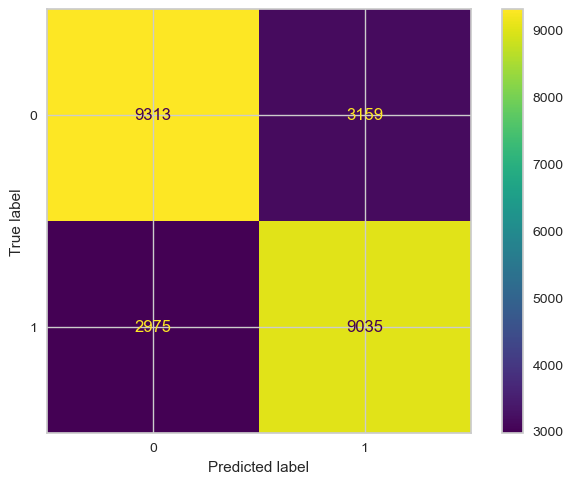

In [19]:
hypertuned_optimal_model = LR(solver="liblinear", multi_class="ovr", max_iter=1500, penalty="l1", random_state=1)
hypertuned_optimal_model.fit(train, y_train)
hypertuned_optimal_model_output = hypertuned_optimal_model.predict(test)

optimal_dummies_lr = pd.get_dummies(hypertuned_optimal_model_output)
dummies_y = pd.get_dummies(y_test)

optimal_auc_lr = roc_auc_score(dummies_y, optimal_dummies_lr, average='macro')
print(f"optimal_auc_lr: {optimal_auc_lr}")

hypertuned_optimal_model_matrix = confusion_matrix(y_test, hypertuned_optimal_model_output, labels=hypertuned_optimal_model.classes_)
hypertuned_optimal_model_graph = ConfusionMatrixDisplay(hypertuned_optimal_model_matrix, display_labels=hypertuned_optimal_model.classes_)
hypertuned_optimal_model_graph.plot()


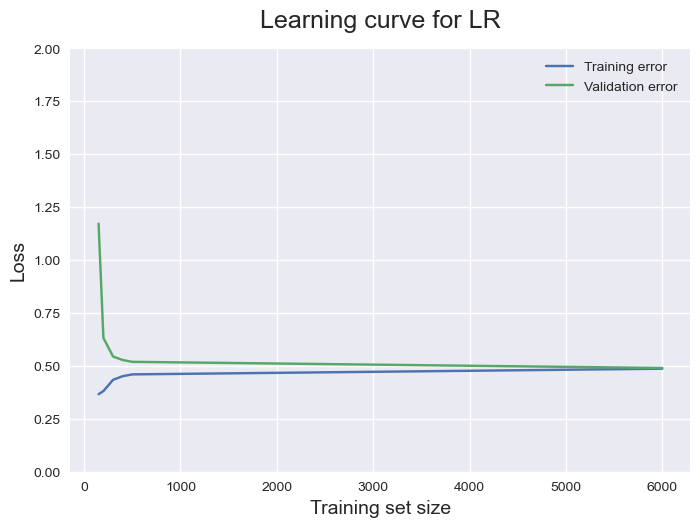

In [20]:
train_sizes = [10,40,80,100,150,200,300, 400,500,6000]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = hypertuned_optimal_model,
X = train,
y = y_train, train_sizes = train_sizes,
scoring = 'neg_log_loss')

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Loss', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curve for LR', fontsize = 18, y = 1.03)
plt.ylim(0,2)
plt.legend()

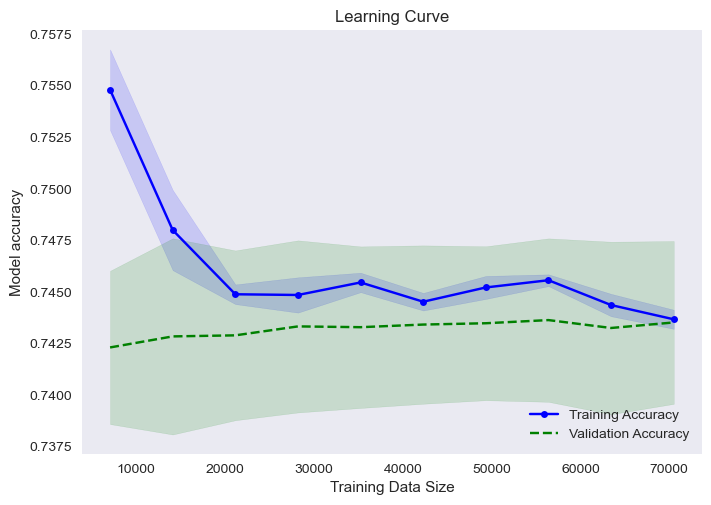

In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline 
from sklearn.model_selection import learning_curve 
from sklearn import datasets
import matplotlib.pyplot as plt

pipeline = make_pipeline(StandardScaler(), LR(solver="liblinear", multi_class="ovr", max_iter=1500, penalty="l1", random_state=1))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [24]:
hypertuned_optimal_model_cr = classification_report(y_test, hypertuned_optimal_model_output)
print(hypertuned_optimal_model_cr)

              precision    recall  f1-score   support

           0       0.76      0.75      0.75     12472
           1       0.74      0.75      0.75     12010

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482



/Users/sanchay/opt/anaconda3/envs/csgo/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


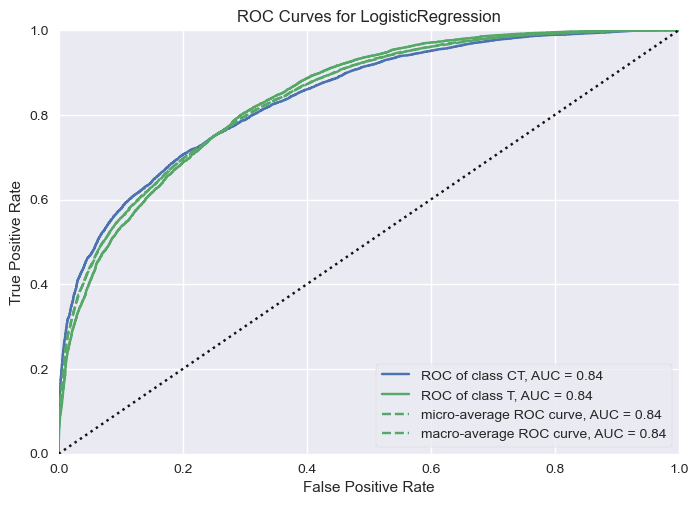

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [25]:
visualizer = ROCAUC(hypertuned_optimal_model, classes=["CT", "T"])
visualizer.fit(train, y_train)        # Fit the training data to the visualizer
visualizer.score(test, y_test)        # Evaluate the model on the test data
visualizer.show()

Neural Network Model

In [26]:
from sklearn.neural_network import MLPClassifier

In [27]:
pretuned_clf = MLPClassifier()
pretuned_clf.fit(train, y_train)
pretuned_clf_output = pretuned_clf.predict(val)

In [28]:
dummies6 = pd.get_dummies(pretuned_clf_output)
dummies_y = pd.get_dummies(y_val)
auc6 = roc_auc_score(dummies_y, dummies6, average='macro')
print(f"auc6: {auc6}")

auc6: 0.7307439405261171


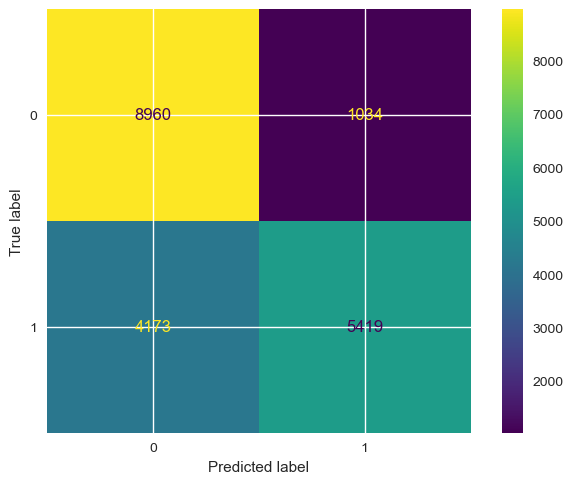

In [29]:
pretuned_clf_matrix = confusion_matrix(y_val, pretuned_clf_output, labels=pretuned_clf.classes_)
pretuned_clf_graph = ConfusionMatrixDisplay(pretuned_clf_matrix, display_labels=pretuned_clf.classes_)
pretuned_clf_graph.plot()


In [30]:
roc_list = []
#####################################################################################################################
pretuned_clf = MLPClassifier(solver="lbfgs", alpha=0.001, hidden_layer_sizes=(10, 85), max_iter=350, random_state=1)
pretuned_clf.fit(train, y_train)
pretuned_clf_output = pretuned_clf.predict(val)

dummies6 = pd.get_dummies(pretuned_clf_output)
dummies_y = pd.get_dummies(y_val)
auc6 = roc_auc_score(dummies_y, dummies6, average='macro')
roc_list.append(auc6)
#####################################################################################################################
pretuned_clf = MLPClassifier(solver="lbfgs", alpha=0.0008, hidden_layer_sizes=(5, 47), max_iter=350, random_state=1)
pretuned_clf.fit(train, y_train)
pretuned_clf_output = pretuned_clf.predict(val)

dummies6 = pd.get_dummies(pretuned_clf_output)
dummies_y = pd.get_dummies(y_val)
auc6 = roc_auc_score(dummies_y, dummies6, average='macro')
roc_list.append(auc6)
#####################################################################################################################
pretuned_clf = MLPClassifier(solver="lbfgs", alpha=0.002, hidden_layer_sizes=(10, 25), max_iter=350, random_state=1)
pretuned_clf.fit(train, y_train)
pretuned_clf_output = pretuned_clf.predict(val)

dummies6 = pd.get_dummies(pretuned_clf_output)
dummies_y = pd.get_dummies(y_val)
auc6 = roc_auc_score(dummies_y, dummies6, average='macro')
roc_list.append(auc6)
#####################################################################################################################

roc_list

/Users/sanchay/opt/anaconda3/envs/csgo/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sanchay/opt/anaconda3/envs/csgo/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sanchay/opt/anaconda3/envs/csgo/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: Conv

[0.737778968465316, 0.7381845704587056, 0.7335621660736225]

In [31]:
roc_list = []
#####################################################################################################################
pretuned_clf = MLPClassifier(solver="adam", alpha=0.2, hidden_layer_sizes=(10, 80), max_iter=350, random_state=1)
pretuned_clf.fit(train, y_train)
pretuned_clf_output = pretuned_clf.predict(val)

dummies6 = pd.get_dummies(pretuned_clf_output)
dummies_y = pd.get_dummies(y_val)
auc6 = roc_auc_score(dummies_y, dummies6, average='macro')
roc_list.append(auc6)
#####################################################################################################################
pretuned_clf = MLPClassifier(solver="lbfgs", alpha=0.8, hidden_layer_sizes=(5, 40), max_iter=350, random_state=1)
pretuned_clf.fit(train, y_train)
pretuned_clf_output = pretuned_clf.predict(val)

dummies6 = pd.get_dummies(pretuned_clf_output)
dummies_y = pd.get_dummies(y_val)
auc6 = roc_auc_score(dummies_y, dummies6, average='macro')
roc_list.append(auc6)
#####################################################################################################################
pretuned_clf = MLPClassifier(solver="lbfgs", alpha=2, hidden_layer_sizes=(10, 100), max_iter=350, random_state=1)
pretuned_clf.fit(train, y_train)
pretuned_clf_output = pretuned_clf.predict(val)

dummies6 = pd.get_dummies(pretuned_clf_output)
dummies_y = pd.get_dummies(y_val)
auc6 = roc_auc_score(dummies_y, dummies6, average='macro')
roc_list.append(auc6)
#####################################################################################################################

roc_list

/Users/sanchay/opt/anaconda3/envs/csgo/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/sanchay/opt/anaconda3/envs/csgo/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0.7496441255078319, 0.7425105605481721, 0.7442759442154032]

In [32]:
roc_list = []
#####################################################################################################################
pretuned_clf = MLPClassifier(solver="adam", alpha=0.2, hidden_layer_sizes=(10, 80), max_iter=350, random_state=1)
pretuned_clf.fit(train, y_train)
pretuned_clf_output = pretuned_clf.predict(val)

dummies6 = pd.get_dummies(pretuned_clf_output)
dummies_y = pd.get_dummies(y_val)
auc6 = roc_auc_score(dummies_y, dummies6, average='macro')
roc_list.append(auc6)
#####################################################################################################################
pretuned_clf = MLPClassifier(solver="adam", alpha=0.8, hidden_layer_sizes=(5, 40), max_iter=350, random_state=1)
pretuned_clf.fit(train, y_train)
pretuned_clf_output = pretuned_clf.predict(val)

dummies6 = pd.get_dummies(pretuned_clf_output)
dummies_y = pd.get_dummies(y_val)
auc6 = roc_auc_score(dummies_y, dummies6, average='macro')
roc_list.append(auc6)
#####################################################################################################################
pretuned_clf = MLPClassifier(solver="adam", alpha=0.02, hidden_layer_sizes=(10, 70), max_iter=350, random_state=1)
pretuned_clf.fit(train, y_train)
pretuned_clf_output = pretuned_clf.predict(val)

dummies6 = pd.get_dummies(pretuned_clf_output)
dummies_y = pd.get_dummies(y_val)
auc6 = roc_auc_score(dummies_y, dummies6, average='macro')
roc_list.append(auc6)
#####################################################################################################################

roc_list

[0.7496441255078319, 0.7446808055642393, 0.7508199248156067]

In [33]:
hypertuned_model = MLPClassifier(solver="adam", alpha=0.02, hidden_layer_sizes=(10, 70), max_iter=350, random_state=1)
hypertuned_model.fit(train, y_train)
hypertuned_model_output = hypertuned_model.predict(val)

In [34]:
dummies6 = pd.get_dummies(hypertuned_model_output)
dummies_y = pd.get_dummies(y_val)
auc6 = roc_auc_score(dummies_y, dummies6, average='macro')
print(f"auc6: {auc6}")

auc6: 0.7508199248156067


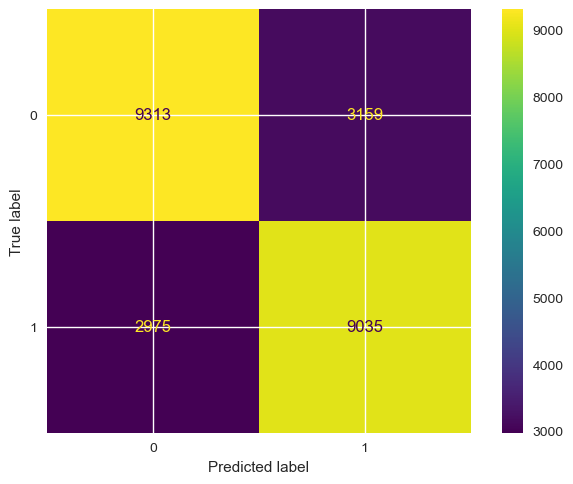

In [35]:
hypertuned_model = MLPClassifier(solver="adam", alpha=0., hidden_layer_sizes=(5, 20), max_iter=350, random_state=1)
hypertuned_model.fit(train, y_train)
hypertuned_model_output = hypertuned_model.predict(val)

hypertuned_model_matrix = confusion_matrix(y_test, hypertuned_optimal_model_output, labels=hypertuned_optimal_model.classes_)
hypertuned_model_graph = ConfusionMatrixDisplay(hypertuned_optimal_model_matrix, display_labels=hypertuned_optimal_model.classes_)
hypertuned_model_graph.plot()


In [ ]:
train_sizes = [10,40,80,100,150,200,300, 400,500,600]
train_sizes, train_scores, validation_scores = learning_curve(
estimator = hypertuned_model,
X = train,
y = y_train, train_sizes = train_sizes,
scoring = 'neg_log_loss')

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)


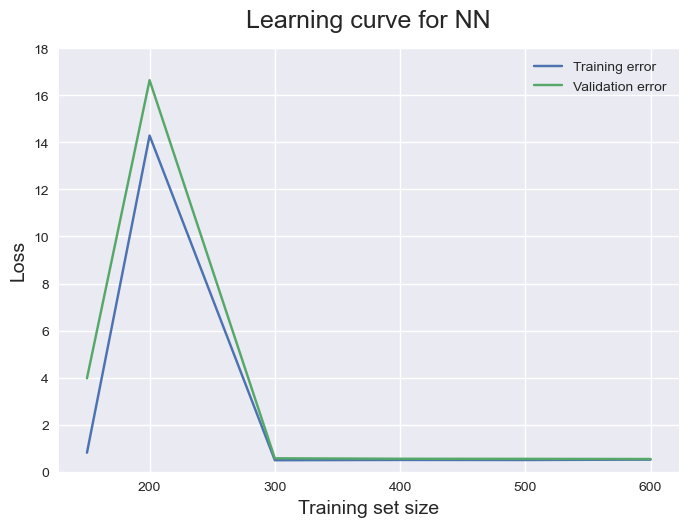

In [49]:
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('Loss', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curve for NN', fontsize = 18, y = 1.03)
plt.ylim(0,18)
plt.legend()

/Users/sanchay/opt/anaconda3/envs/csgo/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


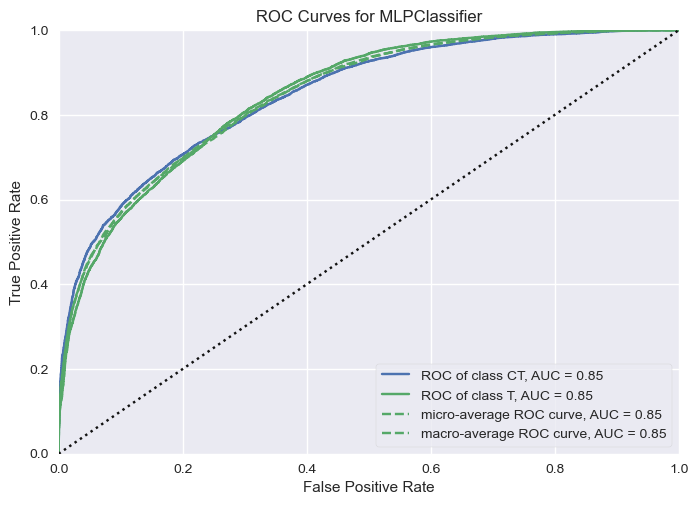

<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [45]:
visualizer = ROCAUC(hypertuned_model, classes=["CT", "T"])
visualizer.fit(train, y_train)        # Fit the training data to the visualizer
visualizer.score(test, y_test)        # Evaluate the model on the test data
visualizer.show()

In [46]:
hypertuned_model_cr = classification_report(y_val, hypertuned_model_output)
print(hypertuned_model_cr)

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      9994
           1       0.76      0.71      0.73      9592

    accuracy                           0.75     19586
   macro avg       0.75      0.75      0.75     19586
weighted avg       0.75      0.75      0.75     19586



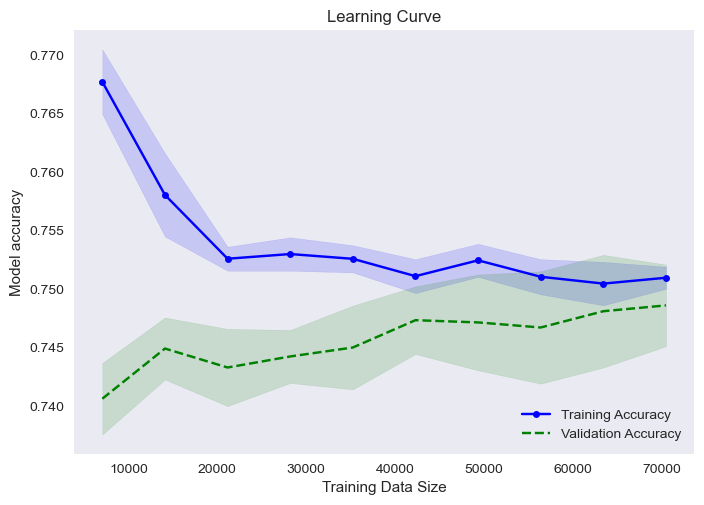

In [50]:
pipeline = make_pipeline(StandardScaler(), hypertuned_model)

train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()